<a href="https://colab.research.google.com/github/harishheerekar/AI-ML-Projects/blob/main/Graph_DB_Neo4j.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install py2neo
!pip install py2neo

#
!pip install networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 3.9 MB/s eta 0:00:00


In [2]:
from py2neo import Graph, Node, Relationship
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
NEO4J_URI="neo4j+s://5590b078.databases.neo4j.io"
NEO4J_USERNAME="neo4j"
NEO4J_PASSWORD="zqqc_LZzfVH-MovB3zQqtZVxTXNN4rR6AgeJOpA2hB4"

In [4]:
# Connect
graph = Graph(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

In [5]:
# Clear any existing data
graph.delete_all()

In [6]:
# Create nodes
alice = Node("Person", name="Alice")
bob = Node("Person", name="Bob")
llm = Node("Technology", name="LLM")

In [7]:
# Create relationships
graph.create(alice | bob | llm)
graph.create(Relationship(alice, "KNOWS", bob))
graph.create(Relationship(alice, "USES", llm))

In [8]:
print(" Graph data created successfully.")

 Graph data created successfully.


In [11]:
query = """
MATCH (a:Person {name: 'Alice'})-[:KNOWS]->(b)
RETURN b.name AS name
"""

results = graph.run(query)
print("Alice knows:")
for row in results:
    print(row['name'])

Alice knows:
Bob


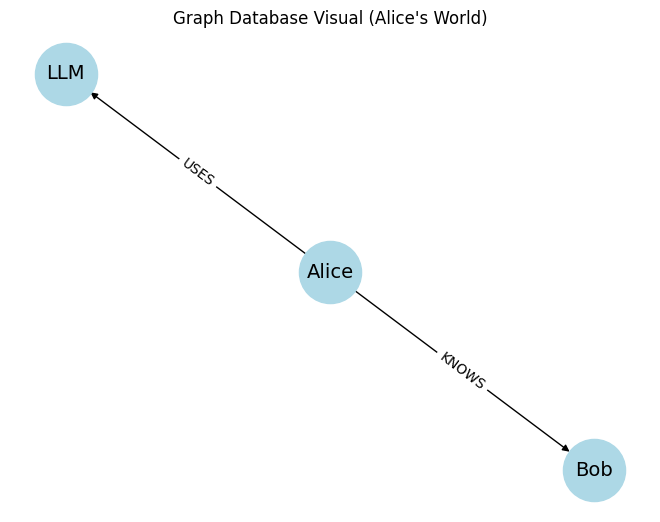

In [12]:
G = nx.DiGraph()
G.add_edge("Alice", "Bob", label="KNOWS")
G.add_edge("Alice", "LLM", label="USES")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=14)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Graph Database Visual (Alice's World)")
plt.show()